In [ ]:
import pandas as pd
import numpy as np
try:
    df_business_master = pd.read_csv('data/InspectionData-scraped/business_master_withyelp.csv', delimiter='\t')
    df_business_master_head = df_business_master.head()
except Exception as e:
    df_business_master_head = str(e)

df_business_master_head


"[Errno 2] No such file or directory: 'data/InspectionData-scraped/business_master_withyelp.csv'"

In [ ]:
# Counting the number of unique names in the "business_master_withyelp.csv" dataset
unique_names_count = df_business_master['name'].nunique()
unique_names_count


2034

In [ ]:
yelpID_unique = df_business_master['YelpID'].nunique()
yelpID_unique


2020

In [ ]:
file_path_mapping = 'data/InspectionData-scraped/mapping.csv'
df_mapping = pd.read_csv(file_path_mapping)

df_mapping.head()


In [ ]:
# Merging the "business_master_withyelp.csv" and "mapping.csv" datasets based on the "permit_id" column
merged_df = pd.merge(df_business_master, df_mapping, on='permit_id', how='inner')

# Displaying the first few rows of the merged dataset
merged_df.head()


,permit_id,name,address,category,permit_url,map_url,phone_num,YelpID,lat_x,lon_x,...,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr,lat_y,lon_y
0,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,38.907893,-77.0038
1,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,12.0,4.0,2.0,0.0,0.0,0.0,10.0,4.0,38.907893,-77.0038
2,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.907893,-77.0038
3,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,2.0,4.0,0.0,0.0,0.0,0.0,2.0,4.0,38.907893,-77.0038
4,6476,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,11.0,7.0,2.0,0.0,0.0,0.0,9.0,7.0,38.907893,-77.0038


In [ ]:
# Counting the number of rows with NaN values in the merged dataset
rows_with_nan = merged_df.isnull().any(axis=1).sum()
rows_with_nan


112

In [ ]:
merged_df.shape

(1977, 24)

In [ ]:
merged_df.columns

Index(['permit_id', 'name', 'address', 'category', 'permit_url', 'map_url',
       'phone_num', 'YelpID', 'lat_x', 'lon_x', 'inspec_id', 'insp_date_x',
       'insp_timein', 'insp_type', 'crit_viol', 'non_crit_viol',
       'crit_viol_cos', 'crit_viol_rpt', 'non_crit_viol_cos',
       'non_crit_viol_rpt', 'crit_viol_tbr', 'non_crit_viol_tbr', 'lat_y',
       'lon_y'],
      dtype='object')

In [ ]:
# Loading the newly uploaded "cleaned_violation_list.csv" dataset
file_path_violation_list = 'data/InspectionData-scraped/cleaned_violation_list.csv'
df_violation_list = pd.read_csv(file_path_violation_list)

# Displaying the first few rows of the violation list dataset to get an overview
df_violation_list.head()


,report,violation,corrected_on_site,repeat_violation
0,105164,0.0,0,0
1,105164,2.0,1,0
2,105164,20.0,1,0
3,105164,31.0,0,0
4,105164,35.0,0,0


In [ ]:
# Merging the "merged_df" and "cleaned_violation_list.csv" datasets based on the "inspec_id" and "report" columns
final_merged_df = pd.merge(merged_df, df_violation_list, left_on='inspec_id', right_on='report', how='inner')

# Displaying the first few rows of the final merged dataset
final_merged_df.head()

,permit_id,name,address,category,permit_url,map_url,phone_num,YelpID,lat_x,lon_x,...,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr,lat_y,lon_y,report,violation,corrected_on_site,repeat_violation
0,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,0.0,0.0,38.907893,-77.0038,405585,0.0,0,0
1,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,0.0,0.0,38.907893,-77.0038,405585,8.0,1,0
2,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,0.0,0.0,38.907893,-77.0038,405585,14.0,1,0
3,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,10.0,4.0,38.907893,-77.0038,810756,0.0,0,0
4,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,10.0,4.0,38.907893,-77.0038,810756,2.0,0,0


In [ ]:
final_merged_df.columns

Index(['permit_id', 'name', 'address', 'category', 'permit_url', 'map_url',
       'phone_num', 'YelpID', 'lat_x', 'lon_x', 'inspec_id', 'insp_date_x',
       'insp_timein', 'insp_type', 'crit_viol', 'non_crit_viol',
       'crit_viol_cos', 'crit_viol_rpt', 'non_crit_viol_cos',
       'non_crit_viol_rpt', 'crit_viol_tbr', 'non_crit_viol_tbr', 'lat_y',
       'lon_y', 'report', 'violation', 'corrected_on_site',
       'repeat_violation'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encoding the 'name' column
le = LabelEncoder()
final_merged_df['name_encoded'] = le.fit_transform(final_merged_df['name'])

# Feature Engineering: Aggregating the data by 'name_encoded' to get frequencies of 'repeat_violation' and 'crit_viol'
grouped_df = final_merged_df.groupby('name_encoded').agg({'repeat_violation': 'sum', 'crit_viol': 'sum'}).reset_index()

# Target Variable: Creating a binary target variable based on 'repeat_violation'
# If 'repeat_violation' > 0 for a restaurant, then it is likely to commit a violation again in the future (label = 1), else label = 0
grouped_df['likely_to_violate_again'] = grouped_df['repeat_violation'].apply(lambda x: 1 if x > 0 else 0)

X = grouped_df[['name_encoded', 'crit_viol']]
y = grouped_df['likely_to_violate_again']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy


0.8951612903225806

In [ ]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       113
           1       0.00      0.00      0.00        11

    accuracy                           0.90       124
   macro avg       0.45      0.49      0.47       124
weighted avg       0.83      0.90      0.86       124



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize models
rf_clf = RandomForestClassifier(random_state=42)
logreg_clf = LogisticRegression(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svc_clf = SVC(random_state=42)

# Store models in a list
classifiers = [rf_clf, logreg_clf, gb_clf, svc_clf]
classifier_names = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Support Vector Machine']

# Initialize report
extensive_report = {}

# Train and evaluate models
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred, zero_division=1)

    extensive_report[name] = {
        'Accuracy': accuracy,
        'Classification Report': class_rep
    }

for i in extensive_report:
    print(i)
    # print(extensive_report[i]['Accuracy'])
    print(extensive_report[i]['Classification Report'])
    print('\n')


Random Forest
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       113
           1       0.00      0.00      0.00        11

    accuracy                           0.90       124
   macro avg       0.45      0.49      0.47       124
weighted avg       0.83      0.90      0.86       124



Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       113
           1       0.00      0.00      0.00        11

    accuracy                           0.90       124
   macro avg       0.46      0.50      0.47       124
weighted avg       0.83      0.90      0.86       124



Gradient Boosting
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       113
           1       0.00      0.00      0.00        11

    accuracy                           0.87       124
   macro avg       0.45      0.48      0.47       124
weighted avg      

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Print the class weights
print("Class Weights:")
for class_label, weight in zip(np.unique(y_train), class_weights):
    print(f"Class {class_label}: {weight}")

# Initialize models
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Store models in a list
classifiers = [rf_clf]
classifier_names = ['Random Forest']

# Initialize report
extensive_report = {}

# Train and evaluate models
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred, zero_division=1)

    extensive_report[name] = {
        'Accuracy': accuracy,
        'Classification Report': class_rep
    }

for i in extensive_report:
    print(i)
    # print(extensive_report[i]['Accuracy'])
    print(extensive_report[i]['Classification Report'])
    print('\n')


Class Weights:
Class 0: 0.5599547511312217
Class 1: 4.669811320754717
Random Forest
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       113
           1       1.00      0.00      0.00        11

    accuracy                           0.91       124
   macro avg       0.96      0.50      0.48       124
weighted avg       0.92      0.91      0.87       124





Observations:
All models have a high accuracy rate, ranging from 87.1% to 91.13%.
All models, except for SVM, failed to correctly identify any restaurant that is likely to commit a violation again (class 1). Even in the case of SVM, while the precision for class 1 is 1.00, the recall is 0.00, indicating that it could not actually identify any such restaurant.
The classifiers appear to be biased towards predicting that restaurants are not likely to commit a violation again. This could be due to class imbalance in the dataset.

## Adressing the issue of class imbalance

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert pandas DataFrame to PyTorch tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Reshape the y tensors
y_train_tensor = y_train_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)

# Define the Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss()(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return F_loss

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Initialize the model, loss, and optimizer
model = SimpleNN()
criterion = FocalLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    loss.backward()
    optimizer.step()

    # Print epoch info
    print(f'Epoch {epoch+1}/{n_epochs} - Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    loss_test = criterion(y_pred_test, y_test_tensor)
    test_loss = loss_test.item()

    # Convert predicted probabilities to binary outputs
    y_pred_binary = (y_pred_test > 0.5).float()
    test_accuracy = (y_pred_binary == y_test_tensor).float().mean().item()

test_loss
print(test_accuracy)


Epoch 1/100 - Loss: 0.0434
Epoch 2/100 - Loss: 0.0434
Epoch 3/100 - Loss: 0.0434
Epoch 4/100 - Loss: 0.0434
Epoch 5/100 - Loss: 0.0434
Epoch 6/100 - Loss: 0.0434
Epoch 7/100 - Loss: 0.0434
Epoch 8/100 - Loss: 0.0434
Epoch 9/100 - Loss: 0.0434
Epoch 10/100 - Loss: 0.0434
Epoch 11/100 - Loss: 0.0434
Epoch 12/100 - Loss: 0.0434
Epoch 13/100 - Loss: 0.0434
Epoch 14/100 - Loss: 0.0434
Epoch 15/100 - Loss: 0.0434
Epoch 16/100 - Loss: 0.0434
Epoch 17/100 - Loss: 0.0434
Epoch 18/100 - Loss: 0.0434
Epoch 19/100 - Loss: 0.0434
Epoch 20/100 - Loss: 0.0434
Epoch 21/100 - Loss: 0.0434
Epoch 22/100 - Loss: 0.0434
Epoch 23/100 - Loss: 0.0434
Epoch 24/100 - Loss: 0.0434
Epoch 25/100 - Loss: 0.0434
Epoch 26/100 - Loss: 0.0434
Epoch 27/100 - Loss: 0.0434
Epoch 28/100 - Loss: 0.0434
Epoch 29/100 - Loss: 0.0434
Epoch 30/100 - Loss: 0.0434
Epoch 31/100 - Loss: 0.0434
Epoch 32/100 - Loss: 0.0434
Epoch 33/100 - Loss: 0.0434
Epoch 34/100 - Loss: 0.0434
Epoch 35/100 - Loss: 0.0434
Epoch 36/100 - Loss: 0.0434
E

In [ ]:
from sklearn.metrics import classification_report

# Convert PyTorch tensor to NumPy array
y_test_np = y_test_tensor.numpy().flatten()
y_pred_binary_np = y_pred_binary.numpy().flatten()

# Generate a classification report
class_report = classification_report(y_test_np, y_pred_binary_np, target_names=["Not Likely to Violate", "Likely to Violate"])

# Print the final report
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(class_report)


Test Loss: 0.0434
Test Accuracy: 0.9113
Classification Report:
                       precision    recall  f1-score   support

Not Likely to Violate       0.91      1.00      0.95       113
    Likely to Violate       0.00      0.00      0.00        11

             accuracy                           0.91       124
            macro avg       0.46      0.50      0.48       124
         weighted avg       0.83      0.91      0.87       124



In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return torch.mean(F_loss)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss, and optimizer
model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
alpha_values = [0.5, 0.75, 0.9, 1]  # Different alpha values for focal loss

for alpha in alpha_values:
    print(f"Training with alpha: {alpha}")
    criterion = FocalLoss(alpha=alpha, gamma=2)

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()

        y_pred = model(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)

        loss.backward()
        optimizer.step()

        # Evaluate the model and print the classification report
        model.eval()
        with torch.no_grad():
            y_pred_test = model(X_test_tensor)
            loss_test = criterion(y_pred_test, y_test_tensor)

            y_pred_binary = (torch.sigmoid(y_pred_test) > 0.5).float().numpy()
            y_test_np = y_test_tensor.numpy()

            class_rep = classification_report(y_test_np, y_pred_binary, target_names=["Not Likely to Violate", "Likely to Violate"])

        print(f"Epoch {epoch+1}/{n_epochs} - Test Loss: {loss_test.item():.4f}")
        print("Classification Report:")
        print(class_rep)


Training with alpha: 0.5
Epoch 1/100 - Test Loss: 17.5004
Classification Report:
                       precision    recall  f1-score   support

Not Likely to Violate       0.85      0.10      0.17       113
    Likely to Violate       0.08      0.82      0.15        11

             accuracy                           0.16       124
            macro avg       0.46      0.46      0.16       124
         weighted avg       0.78      0.16      0.17       124

Epoch 2/100 - Test Loss: 16.9955
Classification Report:
                       precision    recall  f1-score   support

Not Likely to Violate       0.85      0.10      0.17       113
    Likely to Violate       0.08      0.82      0.15        11

             accuracy                           0.16       124
            macro avg       0.46      0.46      0.16       124
         weighted avg       0.78      0.16      0.17       124

Epoch 3/100 - Test Loss: 16.4918
Classification Report:
                       precision    recall  f

Epoch 4/100 - Test Loss: 15.9885
Classification Report:
                       precision    recall  f1-score   support

Not Likely to Violate       0.85      0.10      0.17       113
    Likely to Violate       0.08      0.82      0.15        11

             accuracy                           0.16       124
            macro avg       0.46      0.46      0.16       124
         weighted avg       0.78      0.16      0.17       124

Epoch 5/100 - Test Loss: 15.4859
Classification Report:
                       precision    recall  f1-score   support

Not Likely to Violate       0.79      0.10      0.17       113
    Likely to Violate       0.07      0.73      0.13        11

             accuracy                           0.15       124
            macro avg       0.43      0.41      0.15       124
         weighted avg       0.72      0.15      0.17       124

Epoch 6/100 - Test Loss: 14.9860
Classification Report:
                       precision    recall  f1-score   support

Not Li

For alpha = 1

Epoch 16/100 - Test Loss: 0.1741
Classification Report:
                       precision    recall  f1-score   support



Not Likely to Violate       0.94      0.81      0.87       113

    Likely to Violate       0.19      0.45      0.26        11

             accuracy                           0.77       124
            macro avg       0.56      0.63      0.56       124
         weighted avg       0.87      0.77      0.81       124

In [ ]:
final_merged_df.head()

,permit_id,name,address,category,permit_url,map_url,phone_num,YelpID,lat_x,lon_x,...,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr,lat_y,lon_y,report,violation,corrected_on_site,repeat_violation,name_encoded
0,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,0.0,38.907893,-77.0038,405585,0.0,0,0,0
1,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,0.0,38.907893,-77.0038,405585,8.0,1,0,0
2,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,0.0,0.0,38.907893,-77.0038,405585,14.0,1,0,0
3,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,10.0,4.0,38.907893,-77.0038,810756,0.0,0,0,0
4,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0.0,10.0,4.0,38.907893,-77.0038,810756,2.0,0,0,0


In [ ]:
# save the dataframe
final_merged_df.to_csv('data/InspectionData-scraped/final_merged_df.csv', index=False)

In [ ]:
# Loading the newly uploaded dataset "20160523_1636_All_Service_Requests__Last_30_Days.csv"
file_path_service_requests = 'data/311/20160523_1636_All_Service_Requests__Last_30_Days.csv'
df_service_requests = pd.read_csv(file_path_service_requests)

# Displaying the first few rows of the dataset to get an overview
df_service_requests.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-77.072603,38.916389,3001,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2016-04-21T14:18:39.000Z,2016-04-28T07:59:50.000Z,...,393703.77,138726.23,38.916381,-77.072601,WASHINGTON,DC,20007.0,273553.0,2.0,F Erwin collected bulk on 4/27/16*closed out b...
1,-77.054309,38.910085,3002,S0376,Sign New Investigation,Toa-Trans Sys Mnt-Signs,DDOT,1,2016-04-21T14:19:54.000Z,NaN,...,395289.87,138025.31,38.910077,-77.054307,WASHINGTON,DC,20007.0,275719.0,2.0,NaN
2,-76.924860,38.898552,3003,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2016-04-21T14:17:38.000Z,2016-04-29T11:50:44.000Z,...,406518.30,136746.34,38.898544,-76.924857,WASHINGTON,DC,20019.0,288559.0,7.0,M Green found no bulk out on 4/28/16*closed ou...
3,-76.990666,38.901153,3004,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2016-04-25T01:10:18.000Z,2016-04-25T11:53:54.000Z,...,400809.87,137032.43,38.901145,-76.990664,WASHINGTON,DC,20002.0,73571.0,6.0,NaN
4,-76.990753,38.901518,3005,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2016-04-25T01:10:21.000Z,2016-04-26T13:13:09.000Z,...,400802.27,137073.04,38.901511,-76.990751,WASHINGTON,DC,20002.0,73752.0,6.0,NaN


In [ ]:
waste_keywords = ["waste", "garbage", "trash", "collection"]
hygiene_keywords = ["hygiene", "cleanliness", "sanitation"]

# Function to check if keywords are present in a sentence
def classify_row(row):
    for col in ['SERVICETYPECODEDESCRIPTION', 'SERVICECODEDESCRIPTION', 'DETAILS']:
        description = str(row[col]).lower()

        has_waste = any(keyword in description for keyword in waste_keywords)
        has_hygiene = any(keyword in description for keyword in hygiene_keywords)

        if has_waste or has_hygiene:
            return 1

    return 0

# Apply the classification function to the DataFrame
df_service_requests['IsRelated'] = df_service_requests.apply(classify_row, axis=1)


In [ ]:
df_service_requests['IsRelated'].value_counts()

0    15638
1     7840
Name: IsRelated, dtype: int64

In [ ]:
## write code to get the set of zipcodes such that IsRelated = 1
df_service_requests_related = df_service_requests[df_service_requests['IsRelated'] == 1]

In [ ]:
l = set(df_service_requests_related['ZIPCODE'].unique())

In [ ]:
len(l)

28

In [ ]:
print(l)

{22407.0, 20001.0, 20002.0, 20003.0, 20004.0, 20005.0, 20006.0, 20007.0, 20008.0, 20009.0, 20010.0, 20011.0, 20012.0, 20392.0, 20015.0, 20016.0, 20017.0, 20018.0, 20019.0, 20020.0, 20024.0, 20032.0, 20036.0, 20037.0, 70739.0, 20052.0, 20059.0, 20210.0}


In [ ]:
# find unique values in the column SERVICECODEDESCRIPTION
df_service_requests['SERVICETYPECODEDESCRIPTION'].unique()

array(['SWMA- Solid Waste Management Admistration',
       'Toa-Trans Sys Mnt-Signs',
       'PEMA- Parking Enforcement Management Administration',
       'Toa-Street & Bridge Maintenance', 'SIOD', 'Urban Forrestry',
       'Driver Vehicle Services', 'Toa- Trans Sys Mnt',
       'Adjudication Services', 'DOH- Department Of Health',
       'Transportation Operations Administration',
       'Department of Transportation', 'FEMS-Special Events', 'Tru-311',
       '311- Call Center', 'Department of Energy and Environment',
       'HOMYDRPR- How Is My Driving Program',
       'Transportation Policy & Planning Administration',
       '311- Emergencies', 'Toa- Cw Prog Spt Div', 'FEMS-Smoke Alarms',
       'SNOW'], dtype=object)

In [ ]:
# Importing libraries
import pandas as pd

# Loading the dataset
file_path = 'data/Yelp/yelp_data.csv'
yelp_data_df = pd.read_csv(file_path)

# Displaying the first 5 rows of the dataset to get an overview
yelp_data_df.head()


,permitID,yelpID,categories,street_address,zip,lat,lon,rating,review_count
0,172655.0,a-deli-washington,"[[Italian, italian], [Delis, delis], [Sandwich...",[1300 2nd St NE],20002,38.907441,-77.003578,3.5,28.0
1,6476.0,a-deli-washington,"[[Italian, italian], [Delis, delis], [Sandwich...",[1300 2nd St NE],20002,38.907441,-77.003578,3.5,28.0
2,7190.0,a-and-d-bar-washington,"[[Dive Bars, divebars], [Cocktail Bars, cockta...",[1314 9th St NW],20001,38.907764,-77.024254,4.0,83.0
3,6764.0,a-bar-kitchen-washington,"[[Lounges, lounges]]","[Avenue Suites, 2500 Pennsylvania Ave]",20037,38.903419,-77.053726,4.0,43.0
4,6994.0,a-bloomin-sandwich-cafe-washington,"[[Sandwiches, sandwiches]]",[2141 K St NW 20037],20037,38.902920,-77.048027,4.5,3.0


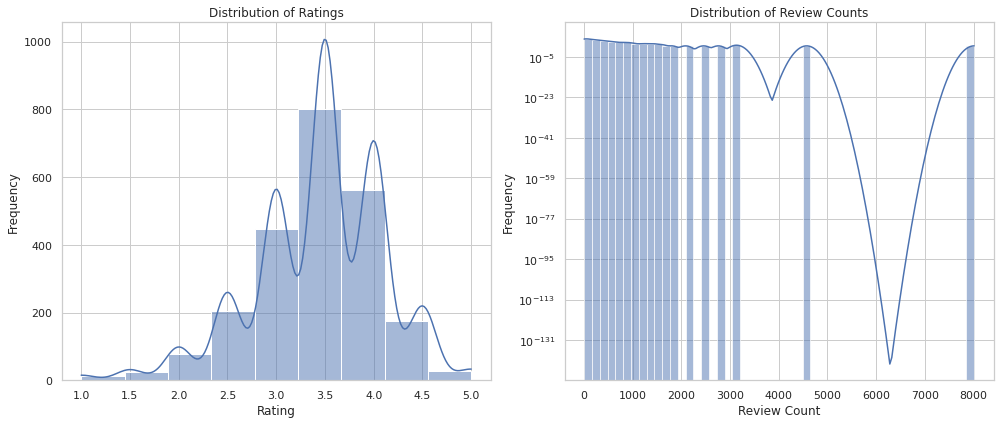

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the distribution of ratings
sns.histplot(yelp_data_df['rating'], kde=True, bins=9, ax=axes[0])
axes[0].set_title('Distribution of Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')

# Plotting the distribution of review counts
sns.histplot(yelp_data_df['review_count'], kde=True, bins=50, ax=axes[1])
axes[1].set_title('Distribution of Review Counts')
axes[1].set_xlabel('Review Count')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')  # Using log scale due to the long tail

plt.tight_layout()
plt.show()


In [ ]:
# Merge the dataframes based on YelpID and yelpID
merged_yelp_df = pd.merge(final_merged_df, yelp_data_df, left_on='YelpID', right_on='yelpID', how='inner')

# Display first few rows to confirm the merge
merged_yelp_df.head()


,permit_id,name,address,category,permit_url,map_url,phone_num,YelpID,lat_x,lon_x,...,name_encoded,permitID,yelpID,categories,street_address,zip,lat,lon,rating,review_count
0,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0,172655.0,a-deli-washington,"[[Italian, italian], [Delis, delis], [Sandwich...",[1300 2nd St NE],20002,38.907441,-77.003578,3.5,28.0
1,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0,6476.0,a-deli-washington,"[[Italian, italian], [Delis, delis], [Sandwich...",[1300 2nd St NE],20002,38.907441,-77.003578,3.5,28.0
2,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0,172655.0,a-deli-washington,"[[Italian, italian], [Delis, delis], [Sandwich...",[1300 2nd St NE],20002,38.907441,-77.003578,3.5,28.0
3,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0,6476.0,a-deli-washington,"[[Italian, italian], [Delis, delis], [Sandwich...",[1300 2nd St NE],20002,38.907441,-77.003578,3.5,28.0
4,172655,A DELI,"1300 2ND ST NE WASHINGTON, DC 20002",Restaurant Total,http://dc.healthinspections.us/webadmin/dhd_43...,http://maps.google.com/maps?q=1300 2ND ST NE W...,2028428045,a-deli-washington,38.907893,-77.0038,...,0,172655.0,a-deli-washington,"[[Italian, italian], [Delis, delis], [Sandwich...",[1300 2nd St NE],20002,38.907441,-77.003578,3.5,28.0


Following Code checks whether each ZIP code in the "zip" column of the merged_yelp_df dataframe is present in the set l and assigns a corresponding value of 1 or 0 to a new column called 'zip_in_l'.

In [ ]:

l = set(map(int, map(float, l)))
# Define a Function to Convert and Check
def check_and_convert_zip(zip_code):
    try:
        zip_code = int(zip_code)
        return 1 if zip_code in l else 0
    except ValueError:
        return 0  # Treat non-integer values as not found in 'l'

# Create a new column 'zip_in_l' in the dataframe
merged_yelp_df['zip_in_l'] = merged_yelp_df['zip'].apply(lambda x: check_and_convert_zip(x))

# The 'zip_in_l' column will contain 1 if the zip code (as an integer) is in set 'l', and 0 otherwise


In [ ]:
merged_yelp_df['zip_in_l'].value_counts()

1    12961
0      632
Name: zip_in_l, dtype: int64

### So the logic here is that if there is a 1 in the column 'zip_in_l' then the restaurant is in the set of zipcodes that we got from the 311 data which means that there is hygiene related complaint for near that restaurant hence there is likely to be a violation in the future